In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import os

import gc

import sklearn.preprocessing as pp

import matplotlib.pyplot as plt
import seaborn as sns
import importlib

import tag_genome_builder as tg_builder


# input params

In [2]:
str_aggregated_path = r'C:\Users\shossein\Documents\personal\research\data\MA14KD_AGGREGATED.csv'
str_genome_scores = r'C:\Users\shossein\Documents\personal\research\data\ml-20m\genome-scores.csv'
str_data_folder = r'C:\Users\shossein\Documents\personal\research\data'
minimum_no_of_frames = 10

# Loading aggregated visual features

In [3]:
usecols = ['movieId', 'no_key_frames']
for i in range(1,11):
    usecols += [f'f{i}_median', f'f{i}_quartile1', f'f{i}_quartile3', f'f{i}_std'] 
print(len(usecols))
df_agg = pd.read_csv(str_aggregated_path, nrows=None, usecols=usecols, index_col='movieId').sort_index()

42


In [4]:
df_agg.no_key_frames.value_counts().sort_index().head(9).sum()

151

In [5]:
df_agg = df_agg[df_agg['no_key_frames'] >= minimum_no_of_frames]

In [36]:
df_agg.shape

(13923, 41)

In [38]:
df_agg.dropna(axis=1, thresh=len(df_agg)-1000, inplace=True)

In [40]:
df_agg.isnull().mean().sort_values(ascending=False).head()

f10_std         0.0
f3_median       0.0
f4_std          0.0
f4_quartile3    0.0
f4_quartile1    0.0
dtype: float64

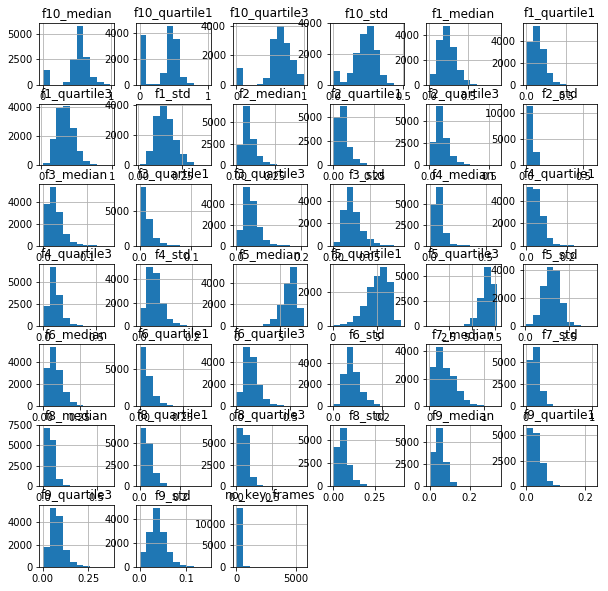

In [41]:
df_agg.hist(figsize=(10,10))
plt.show()

# Loading tag genome

In [42]:
df_genome_scores = pd.read_csv(str_genome_scores, nrows=None)
print(df_genome_scores.shape)
# filter to movies we have in our dataset
# df_genome_scores = df_genome_scores[df_genome_scores.movieId.isin(df_agg.index)]
df_genome_scores.shape

(11709768, 3)


(6373200, 3)

In [43]:
df_genome_scores.head()

,movieId,tagId,relevance
98136,89,1,0.03175
98137,89,2,0.03500
98138,89,3,0.02200
98139,89,4,0.02575
98140,89,5,0.05625


# Building using the package

In [160]:
normalizer = pp.QuantileTransformer(output_distribution='normal')
def reload():
    global tag_genome_builder
    tag_genome_builder = tg_builder.TagGenomeBuilder(normalizer_vf=normalizer, df_agg=df_agg, df_genome_scores=df_genome_scores)
    importlib.reload(tg_builder)
reload()
# tg_builder.visual_feature_to_sparse.fitted = True
# pp.label.check_is_fitted(tg_builder.visual_feature_to_sparse, 'fitted')

In [106]:
df_genome_scores.shape, df_agg.shape

((6373200, 3), (13923, 39))

In [107]:
df_genome_scores.head()

,movieId,tagId,relevance
98136,89,1,0.03175
98137,89,2,0.03500
98138,89,3,0.02200
98139,89,4,0.02575
98140,89,5,0.05625


In [108]:
genome_score_visual_features = tag_genome_builder.fit(df_genome_scores, df_agg)

In [109]:
genome_score_visual_features.shape

(39, 1128)

In [110]:
df_genome_visual_feature = tag_genome_builder.output_vf_genome_matrix_to_df()

In [111]:
df_genome_visual_feature.head()

,visual_feature,tagId,relevance
0,f10_median,1128,-31.746356
1,f10_median,1127,-126.047084
2,f10_median,1126,-241.662255
3,f10_median,1125,-52.464770
4,f10_median,1124,-153.376352


In [112]:
df_genome_visual_feature.tail()

,visual_feature,tagId,relevance
43987,no_key_frames,5,-154.947225
43988,no_key_frames,4,-97.624791
43989,no_key_frames,3,-48.259997
43990,no_key_frames,2,12.618681
43991,no_key_frames,1,24.630905


# compute the tag genome matrix using visual features

In [113]:
df_agg.isnull().sum().sum()

0

In [114]:
df_agg.head()

,no_key_frames,f1_median,f1_quartile1,f1_quartile3,f1_std,f2_median,f2_quartile1,f2_quartile3,f2_std,f3_median,...,f8_quartile3,f8_std,f9_median,f9_quartile1,f9_quartile3,f9_std,f10_median,f10_quartile1,f10_quartile3,f10_std
movieId,,,,,,,,,,,,,,,,,,,,,
89,305.0,0.232789,0.152168,0.445790,0.245090,0.143402,0.045665,0.195960,0.086727,0.032041,...,0.090061,0.054954,0.051389,0.025179,0.078752,0.046080,0.505463,0.428103,0.590203,0.220596
93,263.0,0.145340,0.104328,0.253839,0.188477,0.064021,0.034934,0.100869,0.052052,0.007003,...,0.088245,0.086201,0.031615,0.017059,0.050814,0.036976,0.482586,0.372845,0.608629,0.269302
94,73.0,0.194133,0.124140,0.280971,0.107419,0.045651,0.036389,0.057514,0.029044,0.031245,...,0.089294,0.035162,0.070893,0.049186,0.089273,0.035128,0.595112,0.509645,0.687582,0.196182
95,216.0,0.220355,0.112935,0.320952,0.133965,0.046393,0.025790,0.065134,0.028161,0.018491,...,0.085777,0.065248,0.036852,0.021811,0.056498,0.031234,0.491304,0.423048,0.662239,0.204998
96,36.0,0.175339,0.103335,0.213973,0.114521,0.310864,0.235338,0.428499,0.134135,0.042069,...,0.088747,0.100582,0.004917,0.003215,0.035585,0.071717,0.420271,0.000000,0.527416,0.322523


In [115]:
csr_tag_genome_vf = tag_genome_builder.predict(df_agg, output_df=False)

pd.isnull(visual_feature_norm_sparse.data).sum()

0

In [124]:
csr_tag_genome_vf.shape, df_agg.shape, df_genome_scores.movieId.nunique()

((13923, 1128), (13923, 39), 5650)

In [116]:
df_tag_genome_vf = tag_genome_builder.transform(df_agg, output_df=True)

pd.isnull(df_tag_genome_vf).sum()

movieId      0
tagID        0
relevance    0
dtype: int64

In [161]:
df_top_n_tags = tag_genome_builder.get_to_n_tags(df_tag_genome_vf, 10)

In [162]:
df_top_n_tags.head()

,movieId,tagID,relevance
14020461,131262,1008,17462.829681
13895154,131262,999,16248.740104
13519233,131262,972,15976.452137
10316943,131262,742,21373.577467
6502041,131262,468,17024.287965


In [132]:
n=5
df_tag_genome_vf.head(n)

,movieId,tagID,relevance
10316943,131262,742,21373.577467
3745287,131262,270,18104.222499
2937753,131262,212,18079.396970
14020461,131262,1008,17462.829681
6502041,131262,468,17024.287965


In [128]:
df_genome_scores.movieId.isin(df_tag_genome_vf.movieId).sum(), df_genome_scores.shape

(6373200, (6373200, 3))

In [129]:
df_tag_genome_vf.shape

(15705144, 3)

In [120]:
df_genome_scores[df_genome_scores.movieId.isin(df_tag_genome_vf.head(n).movieId)].head()

,movieId,tagId,relevance


In [ ]:
csr_tag_genome_vf = tag_genome_builder.transform(df_agg, output_df=False)

pd.isnull(visual_feature_norm_sparse.data).sum()

# All below are done above in the package

* Filtering the visual features and tag genome to the same set of movies
* Sparse matrix of tag genom
* Normalizing aggregated visual featur
* Create sparse matrix of visual feature
* Check the size of matrice
* Dot produc
* Convert to Coo sparse matrix for writin
* Dataframe in sparse format

# Some Exploration

In [37]:
df_genome_visual_feature.tagId.nunique()

1128

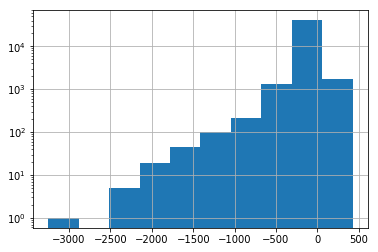

In [35]:
df_genome_visual_feature['relevance'].hist(log=True)

(-25, 25)

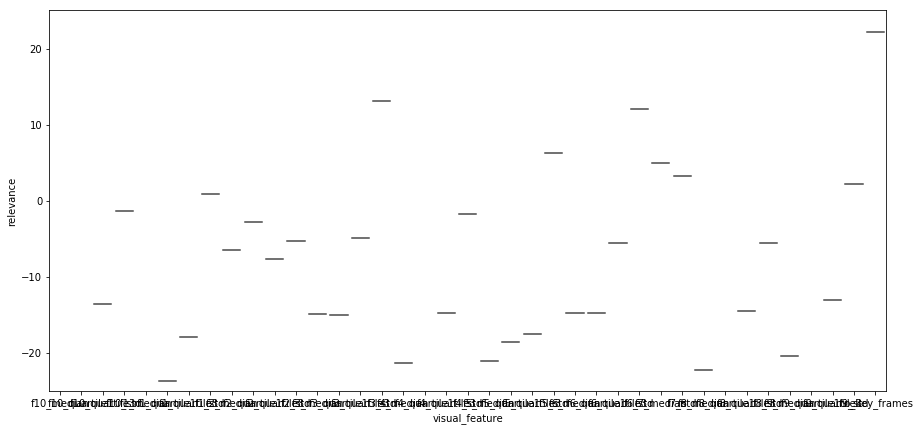

In [36]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.violinplot(x='visual_feature', y='relevance', data=df_genome_visual_feature[df_genome_visual_feature.tagId == 1128])
ax.set_ylim(-25,25)

C:\ProgramData\Anaconda3\envs\hani\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-50, 50)

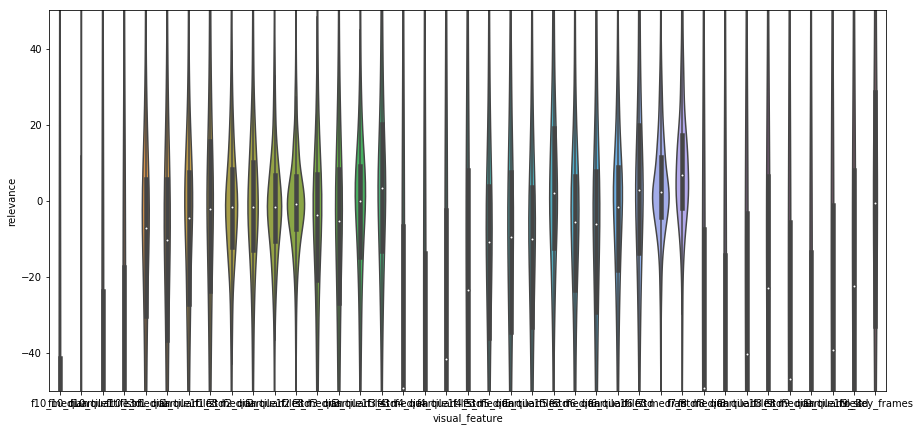

In [37]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.violinplot(x='visual_feature', y='relevance', data=df_genome_visual_feature)
ax.set_ylim(-50,50)

# Compute the matrix of tag genome based on visual features

In [40]:
csr_agg.shape, csr_gnome.shape

((41, 5650), (5650, 1128))

In [41]:
genome_score_visual_features.shape, df_agg.shape

((41, 1128), (5650, 41))

In [42]:
df_agg.head()

,no_key_frames,f1_median,f1_quartile1,f1_quartile3,f1_std,f2_median,f2_quartile1,f2_quartile3,f2_std,f3_median,...,f8_quartile3,f8_std,f9_median,f9_quartile1,f9_quartile3,f9_std,f10_median,f10_quartile1,f10_quartile3,f10_std
movieId,,,,,,,,,,,,,,,,,,,,,
89,305.0,0.232789,0.152168,0.445790,0.245090,0.143402,0.045665,0.195960,0.086727,0.032041,...,0.090061,0.054954,0.051389,0.025179,0.078752,0.046080,0.505463,0.428103,0.590203,0.220596
93,263.0,0.145340,0.104328,0.253839,0.188477,0.064021,0.034934,0.100869,0.052052,0.007003,...,0.088245,0.086201,0.031615,0.017059,0.050814,0.036976,0.482586,0.372845,0.608629,0.269302
94,73.0,0.194133,0.124140,0.280971,0.107419,0.045651,0.036389,0.057514,0.029044,0.031245,...,0.089294,0.035162,0.070893,0.049186,0.089273,0.035128,0.595112,0.509645,0.687582,0.196182
95,216.0,0.220355,0.112935,0.320952,0.133965,0.046393,0.025790,0.065134,0.028161,0.018491,...,0.085777,0.065248,0.036852,0.021811,0.056498,0.031234,0.491304,0.423048,0.662239,0.204998
96,36.0,0.175339,0.103335,0.213973,0.114521,0.310864,0.235338,0.428499,0.134135,0.042069,...,0.088747,0.100582,0.004917,0.003215,0.035585,0.071717,0.420271,0.000000,0.527416,0.322523


In [43]:
df_genome_visual_feature.head()

,visual_feature,tagId,relevance
0,f10_median,1128,-31.746356
1,f10_median,1127,-126.047084
2,f10_median,1126,-241.662255
3,f10_median,1125,-52.464770
4,f10_median,1124,-153.376352
